# 🏡 Mr. Cho Property Project – Part 2
## House Price Prediction & Property Clustering

This notebook is the continuation of Part 1, which focused on data cleaning, exploratory data analysis (EDA), and property recommendations based on Mr. Cho’s criteria.

In Part 2, we will build predictive models to estimate house prices and apply clustering to segment similar types of properties — useful for investment planning over the next few years.

In [1]:
# 📦 Core packages
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🔮 Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 📏 Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📦 Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 📍 Optional: Warnings
import warnings
warnings.filterwarnings('ignore')

# **Data Undestanding**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_porto_2.csv to data_porto_2.csv


In [3]:
df = pd.read_csv('data_porto_2.csv')

# see 5 head
df.head()

# Info Column
df.info()

# Statistic descriptive
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 📥 Data Import & Preprocessing

We begin with the cleaned dataset from Part 1:
- Removed houses with price = 0
- Handled outliers on key numerical features using the IQR method
- No missing or duplicated values remain


In [4]:
# 1. Check missing value
print("Missing values per kolom:")
print(df.isnull().sum())

# 2. Drop duplicate
print("Jumlah data sebelum drop duplikat:", df.shape[0])
df.drop_duplicates(inplace=True)
print("Jumlah data setelah drop duplikat:", df.shape[0])

# 3. Cek outlier with IQR
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')

# 4. Cek Data Inconsistency
print("Tahun pembangunan min:", df['yr_built'].min())
print("Tahun renovasi max:", df['yr_renovated'].max())
print("Harga min:", df['price'].min())

Missing values per kolom:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
Jumlah data sebelum drop duplikat: 4600
Jumlah data setelah drop duplikat: 4600
price: 240 outliers
bedrooms: 118 outliers
bathrooms: 141 outliers
sqft_living: 129 outliers
sqft_lot: 541 outliers
floors: 0 outliers
waterfront: 33 outliers
view: 460 outliers
condition: 6 outliers
sqft_above: 116 outliers
sqft_basement: 82 outliers
yr_built: 0 outliers
yr_renovated: 0 outliers
Tahun pembangunan min: 1900
Tahun renovasi max: 2014
Harga min: 0.0


# **Summary**
* Missing Value : None
* Duplicate : None
* Outlier: some of them have significance outlier price: 240, sqft_lot: 541, view: 460, and others. But this outlier doesnt mean there is 100% problems exist there
* inconsistency : yr_built min = 1900 → valid, yr_renovated max = 2014 → still valid, Harga minimum (minimum price) = 0.0 → ***this suspicious.***

**we can check what the house looks like (either its null, damaged, atau or false data)**



In [5]:
df[df['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


The house have a good data but the price is 0, this maybe false input problem so we dropped this data

In [6]:
# Delete houses whose price is 0
df = df[df['price'] > 0]
print("Jumlah data setelah hapus harga 0:", df.shape[0])

Jumlah data setelah hapus harga 0: 4551


Other than the data that we dropped before, now we need to check the outlier. we can do it by visualizing with boxplot.

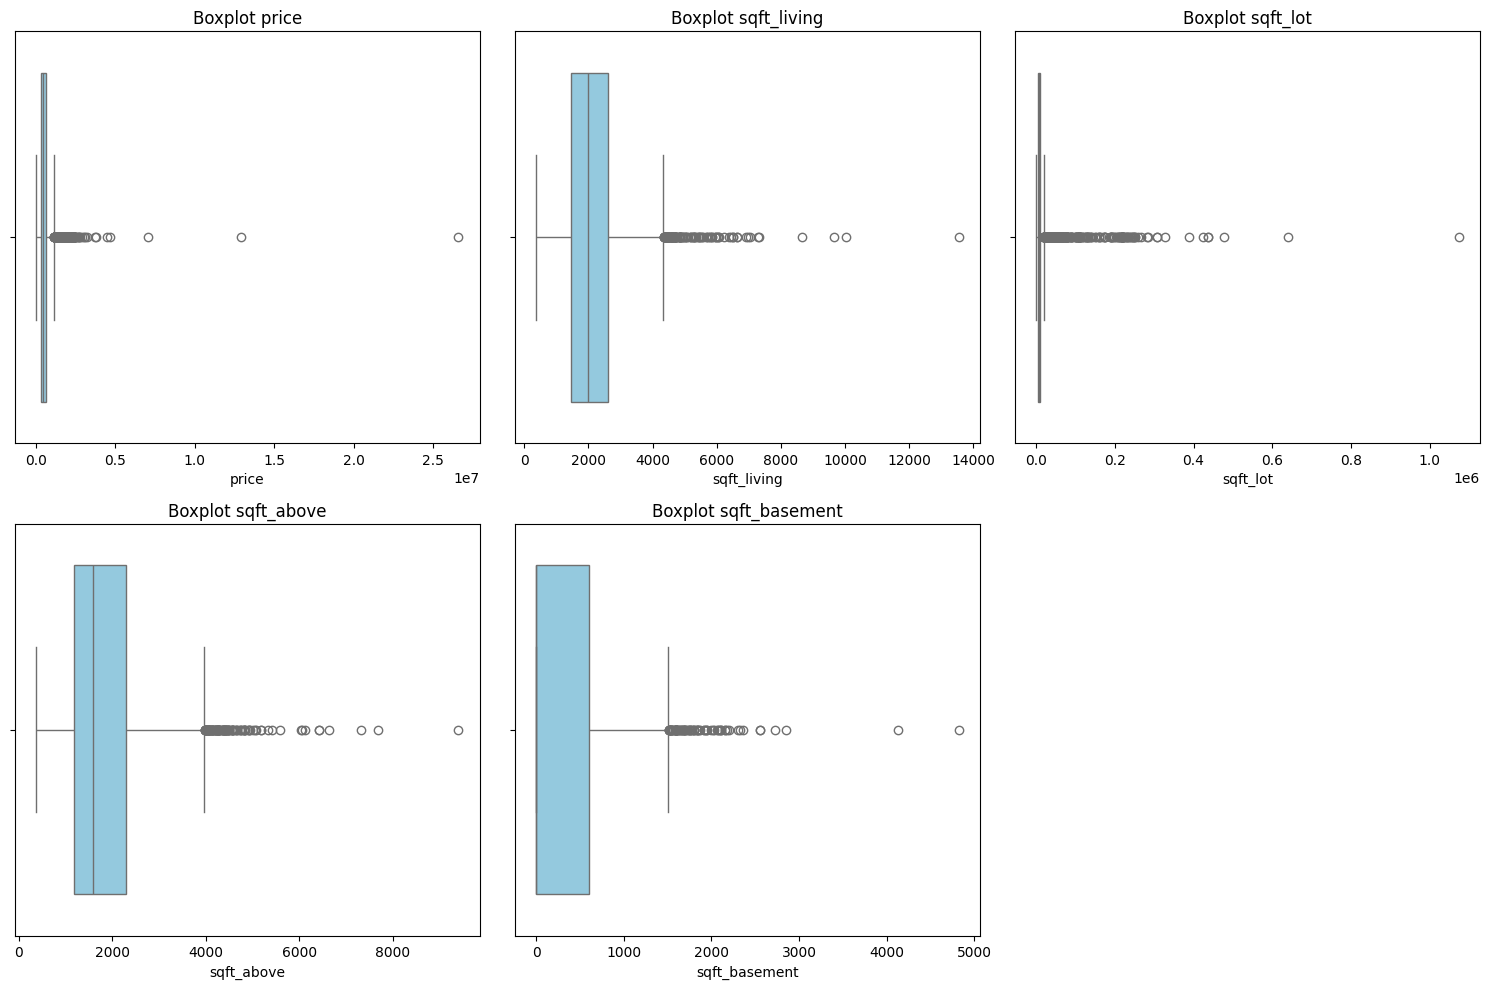

In [7]:
# Select the features that most often have outliers
cols_to_plot = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.show()

# why we choose this outlier ?

*   price ✅ Yes There are extremely expensive houses
*   bedrooms ❌ Skip it Houses with 7-10 rooms can really exist, not an error
*   bathrooms ❌ Skip it Same as bedrooms — some luxury houses can have 5+ bathrooms
*   sqft_living ✅ Yes Extreme values ​​can distort the distribution (eg houses 10x larger)
*   sqft_lot ✅ Yes Many houses have very large land, but the amount is minor (long tail)
*   waterfront ❌ Skip it There are only 2 values ​​(0 and 1), not continuous numeric data (so false outliers)
*   view ❌ Skip it Ordinal scale 0-4, no need to handle with IQR
*   condition ❌ Skip it Scale 1-5, safe and relatively balanced
*   sqft_above ✅ Yes Almost the same pattern as sqft_living, and can distort the analysis
*   sqft_basement ✅ Yes, there are some houses with really big basements.
*   yr built and year renovated is 0 outlier so it self explanatory (not included)





## The Conclusion by the boxplot above is
* price : There are houses with prices >25 million USD → most likely extreme outliers
* sqft_living : Houses with living space >10,000 sqft → very rare, can be cut
* sqft_lot : Lot size >400,000 sqft → can be disturbing because it is too extreme
* sqft_above :  Outliers are quite far at >7,000 sqft → prone to disturbing visualization/ML
* sqft_basement : There is a super large basement (4,000–5,000 sqft) → can be considered noise

# **so we can solve this by**


1.   Replace Outlier with NaN
2.   Change NaN with Median. so the data distribution become stable


In [8]:
outlier_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].apply(lambda x: x if pd.notna(x) and lower <= x <= upper else np.nan)

# NaN content using the median of the respective column
df[outlier_cols] = df[outlier_cols].fillna(df[outlier_cols].median())

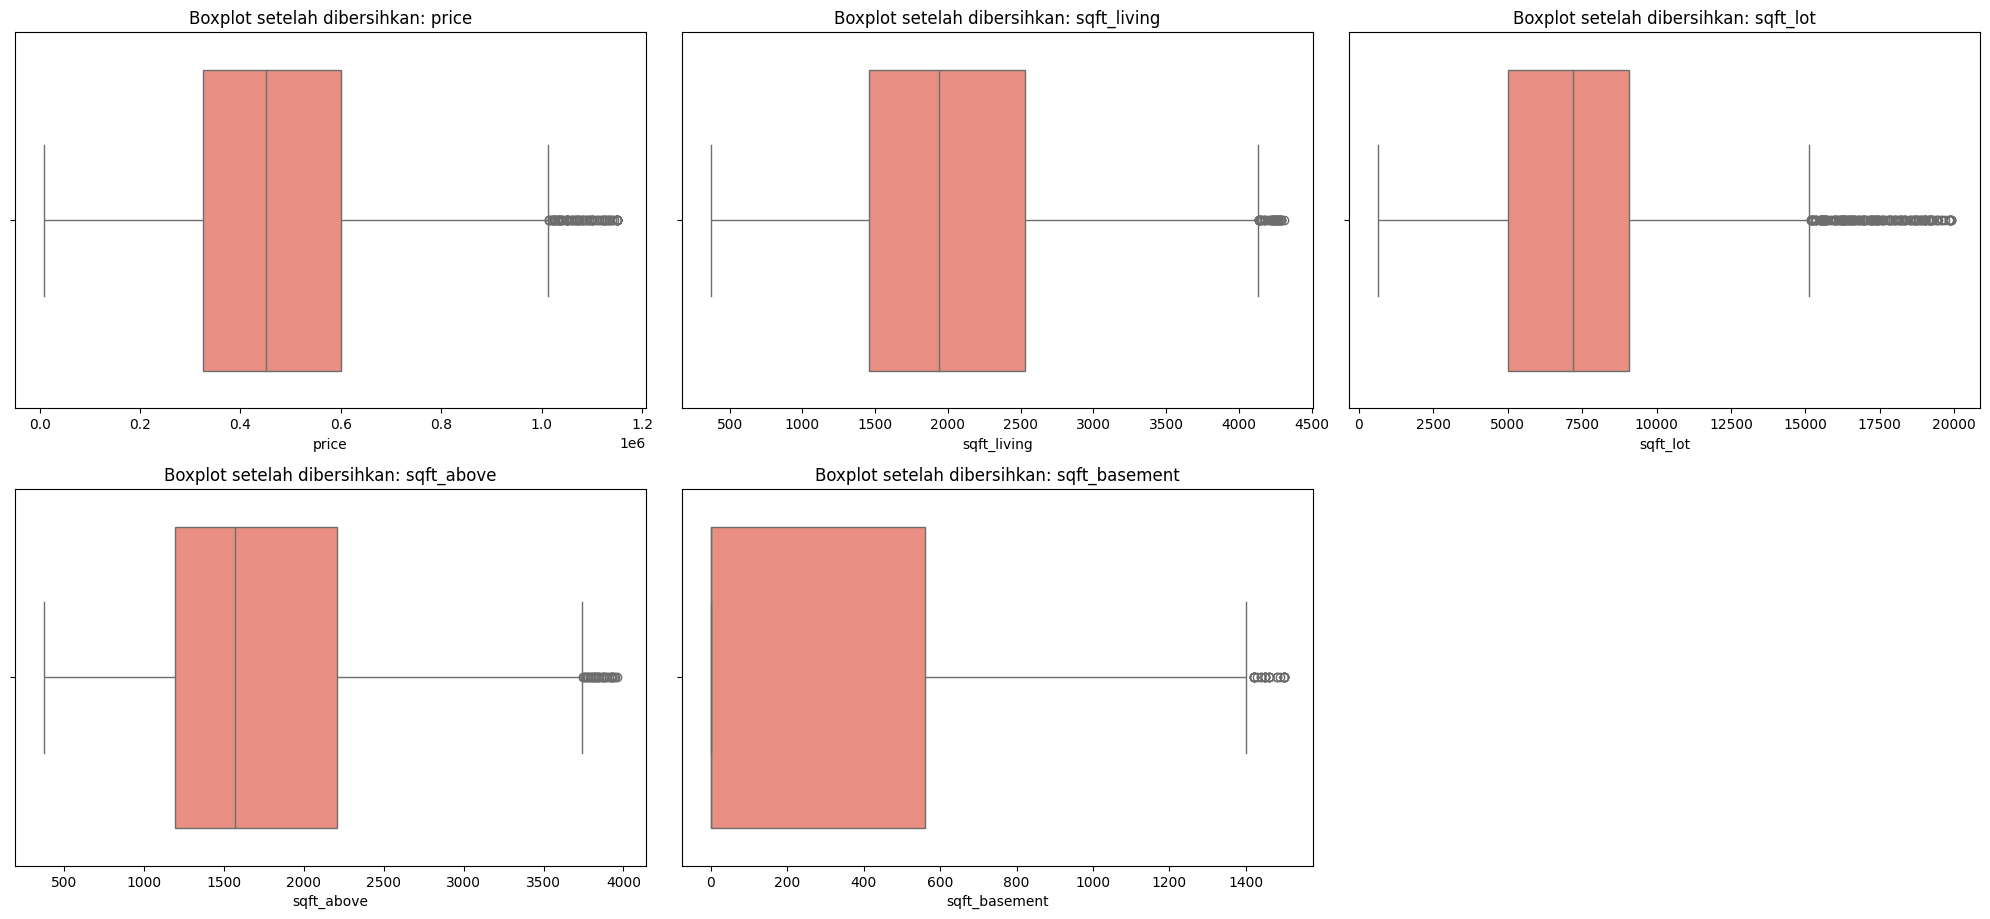

In [9]:
fix_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Re-visualize boxplot after handling outliers
plt.figure(figsize=(20, 18))

for i, col in enumerate(fix_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot setelah dibersihkan: {col}')
    plt.tight_layout()

plt.show()

Now the data has been cleaned (check image above). so we can continue to EDA (explanatory data analysts)

## 📊 Exploratory Data Analysis (EDA) for Modeling

The goal of this EDA is to analyze which features may significantly impact house prices and help guide our predictive model design.

- Visualize price distribution

- Check correlation with numerical features

- Plot scatter between price vs key predictors

### 📈 Distribution of House Prices

Let’s explore the distribution of the target variable `price` to check for skewness and whether transformation is needed.

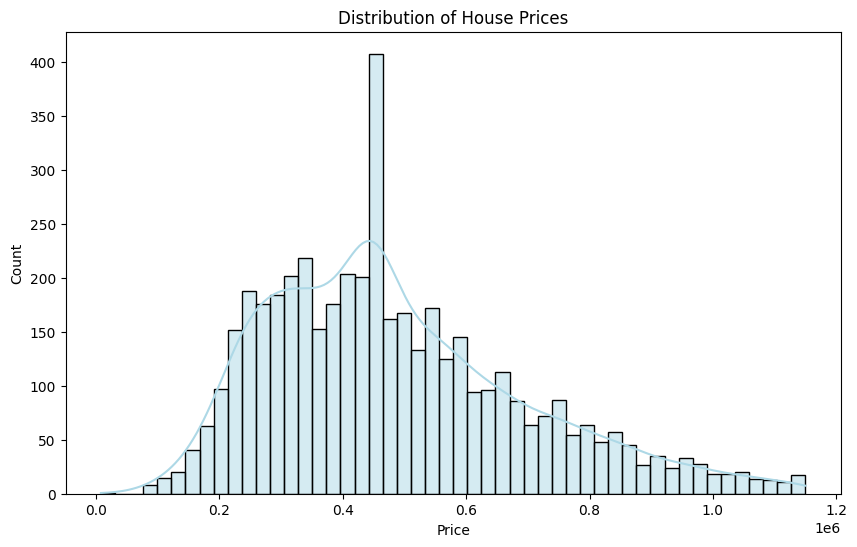

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='lightblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Insight:**  
- The distribution is right-skewed, meaning the majority of house prices are concentrated in the lower to mid-price range.

- A significant spike around $450,000 suggests it might be a market anchor price — possibly influenced by pricing psychology or local regulations.

- There are a few very high-priced outliers, which could negatively affect regression performance if not handled (e.g., via log transformation).

- This kind of distribution is typical in real estate markets, where luxury homes exist but are not common.

##  2. Log-Transformed Price

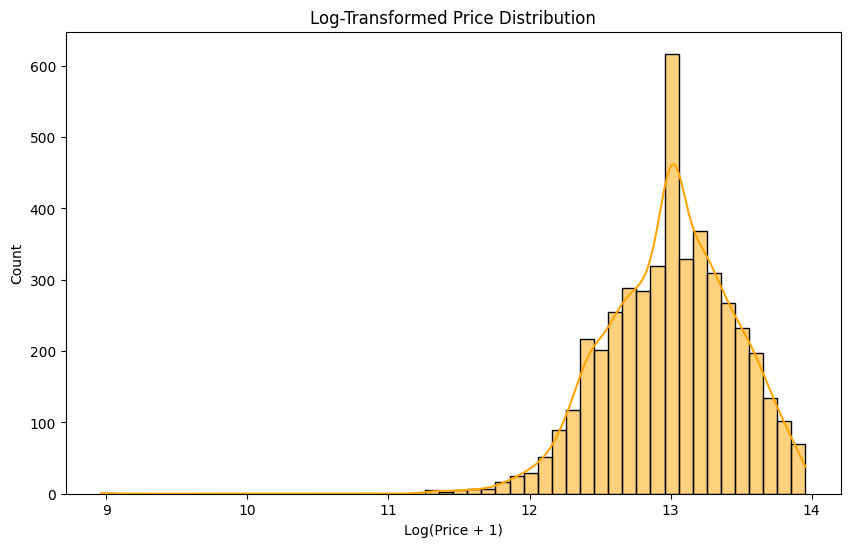

In [11]:
import numpy as np

# Create a new column for log-transformed price
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Count')
plt.show()

### 📊 Insight: Log-Transformed Price Distribution

The log-transformed `price` variable now displays a much more symmetrical and bell-shaped distribution, which closely resembles a normal distribution.

- This transformation reduces the effect of extreme outliers, which dominated the original price distribution.
- By compressing the range of high prices, it helps **improve the performance of models** that assume normally distributed targets (such as linear regression).
- It also helps stabilize variance and can lead to **more consistent and generalizable predictions**.

📌 For modeling, we will use the log-transformed price (`log_price`) as the target variable, since it offers a more normalized distribution and reduces the influence of outliers.

### 🔗 Correlation Matrix (Numerical Features)

We compute the Pearson correlation to identify features that are strongly associated with `price`.

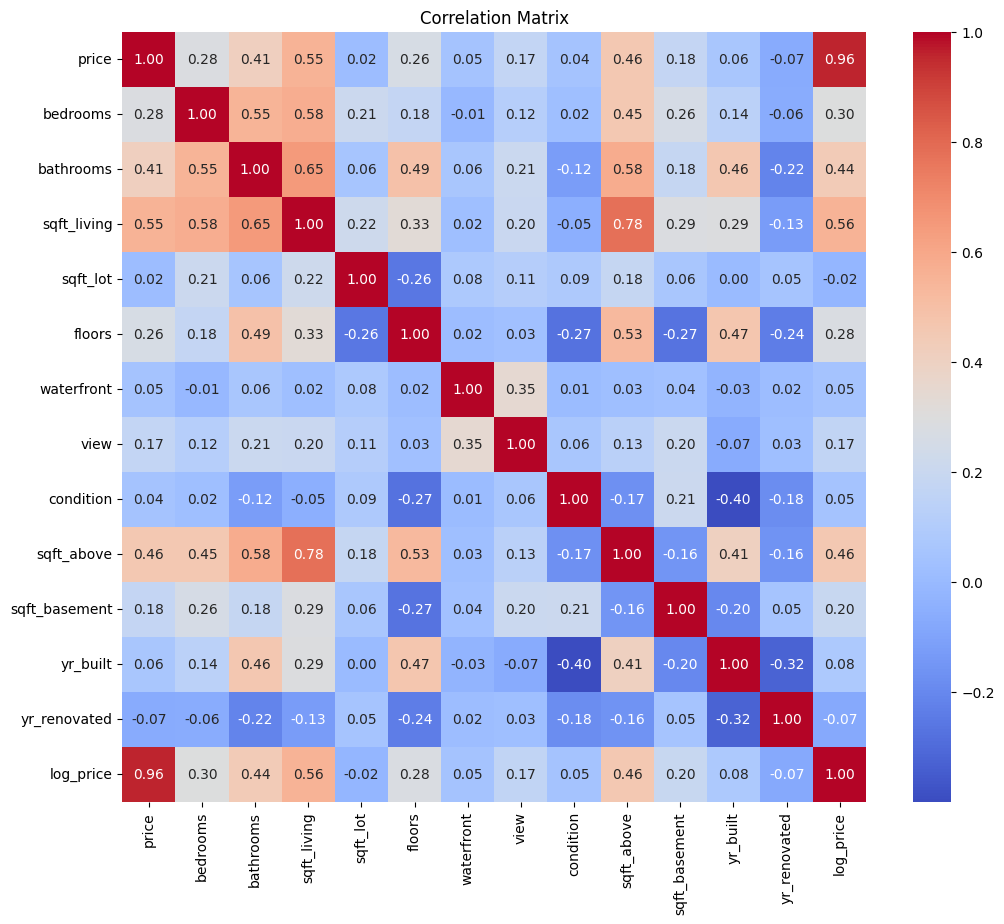

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 🔗 Insight: Feature Correlation with Price

Based on the correlation matrix:

- **Strongest positive correlations with `price` / `log_price`**:
  - `sqft_living` (0.55 / 0.56)
  - `bathrooms` (0.41 / 0.44)
  - `sqft_above` (0.46)
- `bedrooms` and `floors` also show moderate correlation.
- `waterfront` and `view` have low correlation values, but may still carry **categorical importance**.
- Features like `sqft_lot`, `yr_renovated`, and `condition` have weak or near-zero correlation with price.

📌 **Next step**:
We’ll use the most relevant features for our regression model — starting with `sqft_living`, `bathrooms`, `bedrooms`, `sqft_above`, and test categorical ones like `view` and `waterfront`.


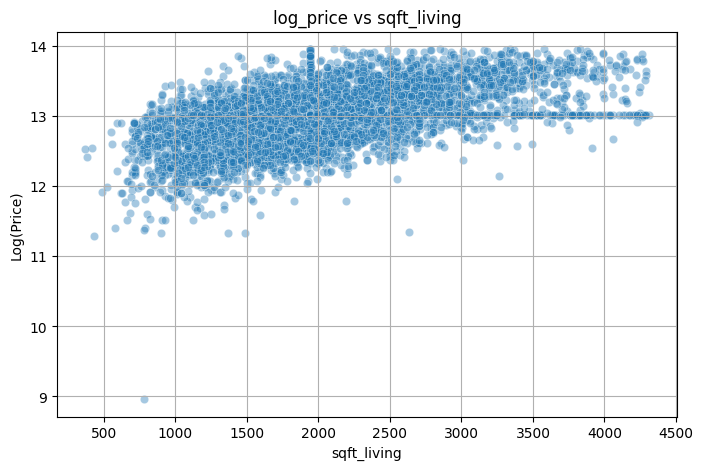

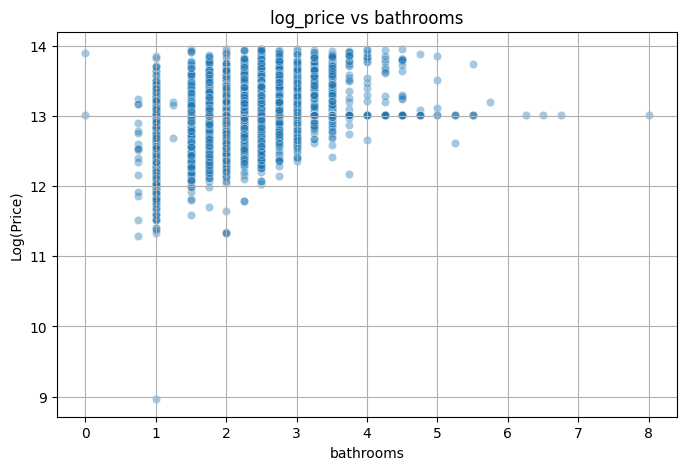

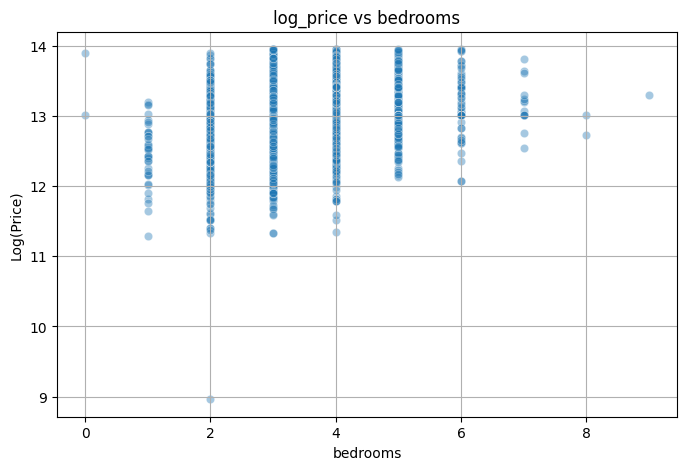

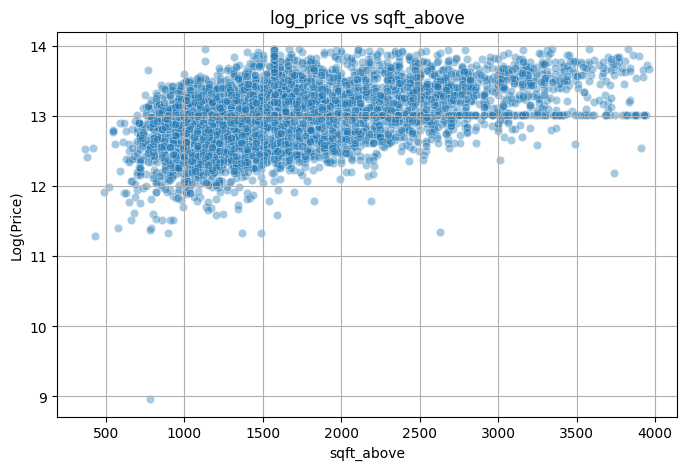

In [13]:
# Top correlated features to visualize against log_price
top_features = ['sqft_living', 'bathrooms', 'bedrooms', 'sqft_above']

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='log_price', alpha=0.4)
    plt.title(f'log_price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log(Price)')
    plt.grid(True)
    plt.show()

### 📈 log_price vs sqft_living

The scatter plot shows a **clear positive linear relationship** between the living area (`sqft_living`) and house price.

- As the size of the living area increases, the house price (log-transformed) tends to increase as well.
- The data points are dense in the lower size range (~1000–2500 sqft), which reflects the most common house sizes.
- A few large houses exist beyond 4000 sqft, but they are rare.

✅ This supports `sqft_living` as a **strong predictor** for price in our regression model.

### 🚿 log_price vs bathrooms

This scatter plot shows a **positive relationship** between the number of bathrooms and house prices.

- Houses with more bathrooms tend to have higher prices, especially up to 3–4 bathrooms.
- The plot shows a **step-like distribution**, as `bathrooms` is a discrete numeric feature (not continuous).
- There's a visible plateau effect — beyond 4 bathrooms, the price increase is less consistent, suggesting diminishing returns.

📝 `bathrooms` remains a useful feature, but may not increase price linearly at higher values.

### 🛏️ log_price vs bedrooms

The relationship between the number of bedrooms and house price appears **weak and non-linear**:

- Most properties fall between 2–5 bedrooms, with high density around 3–4.
- Having more bedrooms does not always guarantee a higher price — in fact, some 3-bedroom homes are more expensive than 5-bedroom ones.
- This suggests that **bedroom count alone is not a strong predictor** of price. It likely interacts with other variables such as location, condition, and square footage.

📌 We'll keep `bedrooms` in the model for now, but it may have limited standalone impact.


### 📐 log_price vs sqft_above

There is a **clear positive trend** between `sqft_above` (above-ground living area) and house prices:

- As the above-ground square footage increases, the house price (log-transformed) generally increases as well.
- The pattern is quite similar to `sqft_living`, which makes sense since `sqft_living = sqft_above + sqft_basement`.
- There’s a strong linear region up to ~3000 sqft, after which the trend becomes flatter — indicating **diminishing returns** at very large sizes.

✅ `sqft_above` is a solid predictor and will be included in the regression model.

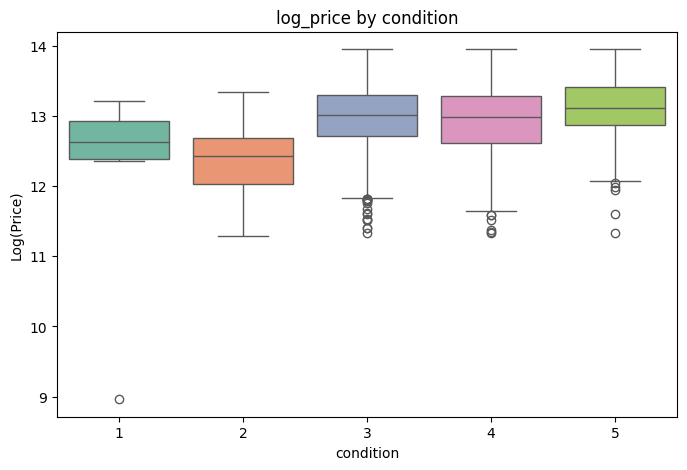

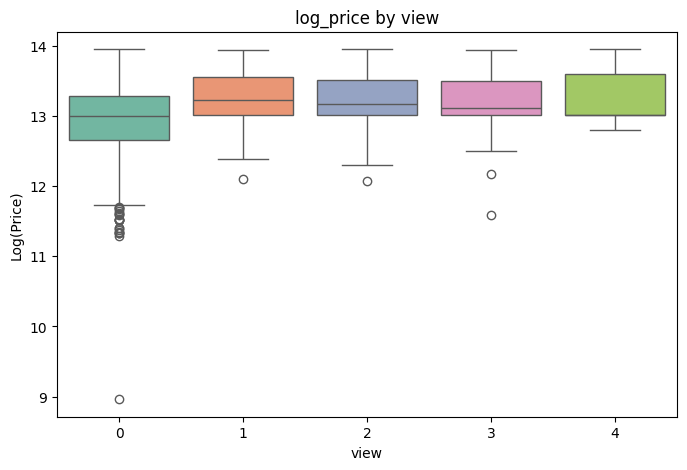

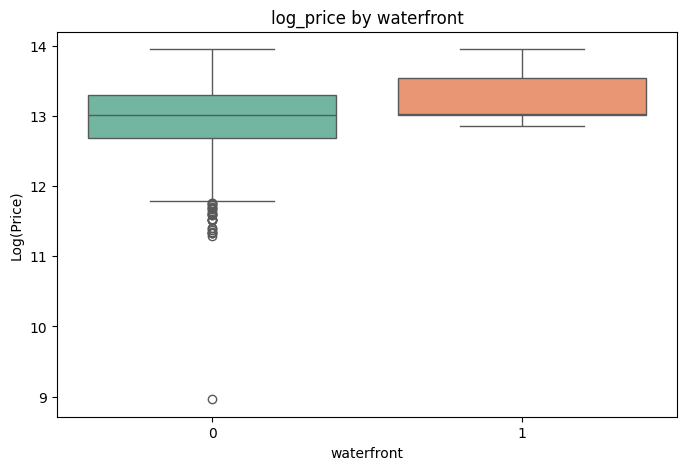

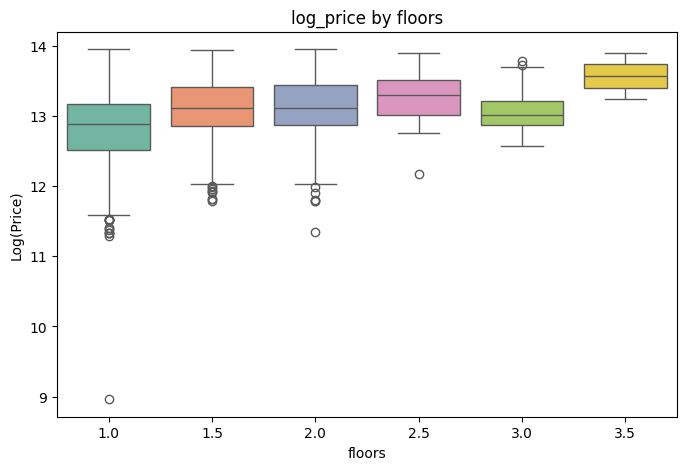

In [14]:
# Categorical features to visualize
cat_features = ['condition', 'view', 'waterfront', 'floors']

for feature in cat_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[feature], y=df['log_price'], palette='Set2')
    plt.title(f'log_price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log(Price)')
    plt.show()

### 🧱 log_price by Condition

This boxplot shows how house condition (rated from 1 to 5) affects the log-transformed price:

- There is a **slight upward trend**: houses in better condition generally have higher prices.
- Most homes are rated **3, 4, or 5**, with very few rated 1 or 2 — making those categories statistically weaker.
- The median price for condition 4 and 5 is slightly higher, but there's still **considerable overlap** in all groups.

📌 We'll keep `condition` as a feature, though its predictive power might be limited and nonlinear.

### 👁️ log_price by View Score

This boxplot shows how the `view` score (0 to 4) affects house prices:

- Houses with better views tend to have **higher log-transformed prices**, especially from score 1 upward.
- The median price increases steadily with the view score, indicating a **positive correlation**.
- Most houses have a `view` score of 0, making other categories relatively sparse — this may require handling or grouping in modeling.

📌 `view` is a useful categorical feature and can be encoded for regression models.


### 🌊 log_price by Waterfront

This boxplot shows a **clear price difference** between homes with and without waterfront access:

- Houses with `waterfront = 1` are **significantly more expensive** than those without.
- The median log_price is noticeably higher, and the overall price range is tighter — likely due to the premium nature of such properties.
- However, waterfront homes are rare in the dataset, making the group size imbalanced.

📌 `waterfront` is a strong binary feature and should be kept in the regression model.

### 🏢 log_price by Number of Floors

This plot explores the relationship between the number of floors and log-transformed house price:

- Overall, houses with more floors tend to have **slightly higher prices**, but the difference isn't as strong as with other features.
- There is no clear linear trend — for example, homes with 3 floors don't always outperform those with 2.5.
- Most homes fall between 1.0 and 2.5 floors, with few samples at the extremes (e.g., 3.5 floors).

📌 `floors` might not be a strong standalone predictor, but could still be useful in combination with other features.

### 🧱 Feature Preparation for Modeling

Before training our regression models, we prepare the dataset:

1. **Categorical Encoding**  
   We convert categorical features (`condition`, `view`, `floors`) into numerical format using one-hot encoding.

2. **Feature Scaling**  
   Numerical features are standardized using `StandardScaler` to ensure they are on the same scale.

3. **Target Definition**  
   We use `log_price` as the target variable due to its more normalized distribution.

4. **Train-Test Split**  
   The dataset is split into training and testing sets to evaluate model performance objectively.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Select features
num_features = ['sqft_living', 'bathrooms', 'sqft_above', 'bedrooms', 'sqft_basement', 'yr_built', 'yr_renovated']
cat_features = ['condition', 'view', 'floors', 'waterfront']

# 2. One-hot encode categorical features
df_encoded = pd.get_dummies(df[cat_features], columns=cat_features, drop_first=True)

# 3. Combine with numerical features
X_raw = pd.concat([df[num_features], df_encoded], axis=1)

# 4. Scale numerical features
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[num_features])

# Replace numerical part with scaled values
X_scaled = pd.DataFrame(X_scaled_num, columns=num_features, index=df.index)
X = pd.concat([X_scaled, df_encoded], axis=1)

# 5. Define target variable
y = df['log_price']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: check shape
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (3640, 21)
Test shape : (911, 21)


### 🔮 Baseline Model: Linear Regression

Now we start with a simple linear regression model using our processed features. This helps us establish a baseline before testing more complex models.

**Evaluation Metrics:**
- **MAE (Mean Absolute Error):** Measures average error in predictions
- **RMSE (Root Mean Squared Error):** Penalizes larger errors
- **R² Score:** Indicates how well the model explains price variation (1.0 = perfect)

The scatter plot below shows how close our predictions are to actual prices. The red dashed line represents the ideal (perfect prediction).

Linear Regression Performance:
MAE  : 0.2869
RMSE : 0.3526
R²   : 0.3680


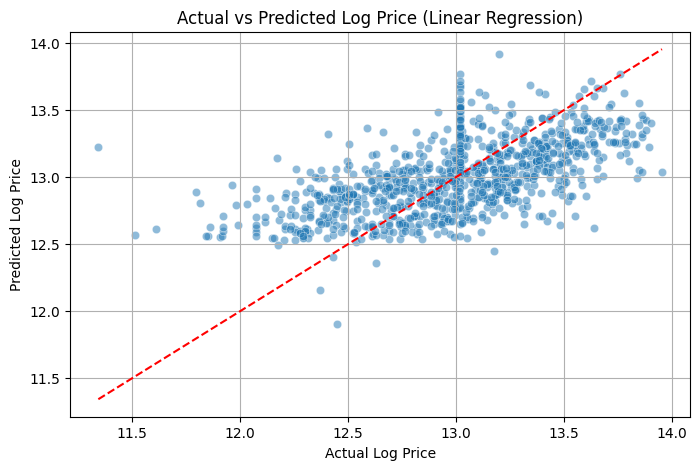

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict on test data
y_pred = lr_model.predict(X_test)

# 3. Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# 4. Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted Log Price (Linear Regression)")
plt.grid(True)
plt.show()

##📊 Plot Interpretation

- The distribution is spreading below the red line
→ This means the model tends to underpredict (predicted prices are lower than actual).

- There is a “horizontal cluster” pattern around 13
→ This is likely due to the spike in data from many homes priced around $400K–$500K (remember the log_price histogram earlier).

- The spread is somewhat wider
→ The linear model may not be able to capture all the complexity of the feature-price relationship.

##🧠 Quick Insight:

Linear Regression provides a pretty good baseline, but:

- Still underfits (many predictions are wrong)

- Tends to be too simplistic for non-linear relationships

### 🌲 Random Forest Regression

After establishing a baseline with Linear Regression, we now test a more powerful model: Random Forest.

**Why Random Forest?**
- Captures complex non-linear relationships
- Robust to outliers and noise
- No need for feature scaling

**Evaluation Results:**
- MAE (Mean Absolute Error): Measures average absolute prediction error
- RMSE (Root Mean Squared Error): Penalizes large errors
- R² Score: Measures the proportion of price variance explained by the model

The scatter plot shows how well the model predictions align with actual values. The closer the dots are to the red line, the better.

 Random Forest Performance:
MAE  : 0.2725
RMSE : 0.3447
R²   : 0.3962


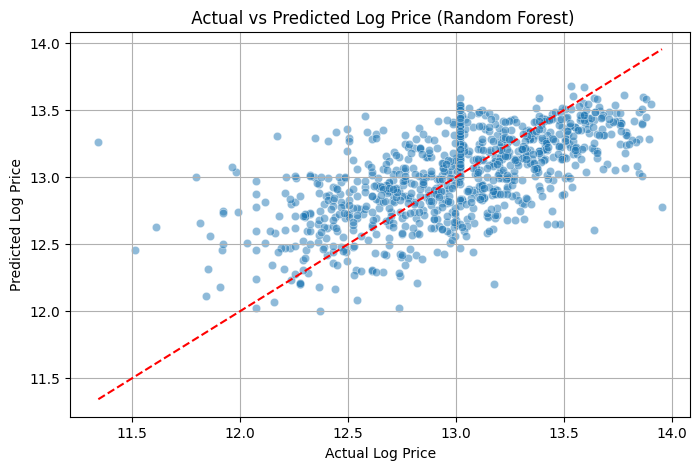

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluation
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(" Random Forest Performance:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# 4. Plot Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title(" Actual vs Predicted Log Price (Random Forest)")
plt.grid(True)
plt.show()

### 📈 Insight: Actual vs Predicted Log Price (Random Forest)

The Random Forest model produces better results than Linear Regression. Here are some insights from the visualization:

✅ **Predictions are spread closer to the diagonal line**
The model is able to capture price variation better than linear regression.

✅ **Underprediction still occurs, but not as severe as the previous model**
Some predictions are still lower than the actual price, but by a smaller amount.

✅ **Horizontal cluster is visible around log_price ≈ 13**
This reflects many properties that are priced around \$400,000. The model may be guessing prices in this range too often due to the dominance of the data.

---

### 🛠️ Next Step: What Can Be Done?

1. 🔍 **Feature Importance**
- Find out which features have the most influence on price predictions.

2. 💵 **Convert to Real Price**
- Use `np.expm1()` to convert the log_price predictions to the real price format (USD), so that it can be used in a business context.

3. 📊 **Compare Models**
- Create a model evaluation table (MAE, RMSE, R²) to compare Linear Regression and Random Forest.
- Select the best model based on performance.

### 🔍 Feature Importance (Random Forest)

Through Random Forest, we can find out how much each feature contributes to predicting house prices.

Features with the highest **importance** value mean that they most influence the model in guessing house prices.

Examples of features that are usually important:
- `sqft_living`: house size is usually highly correlated with price.
- `bathrooms` / `bedrooms`: the more, the higher the price.
- `view` and `waterfront`: can significantly increase the selling value.

This information can be a strong basis for explaining home buying decisions.

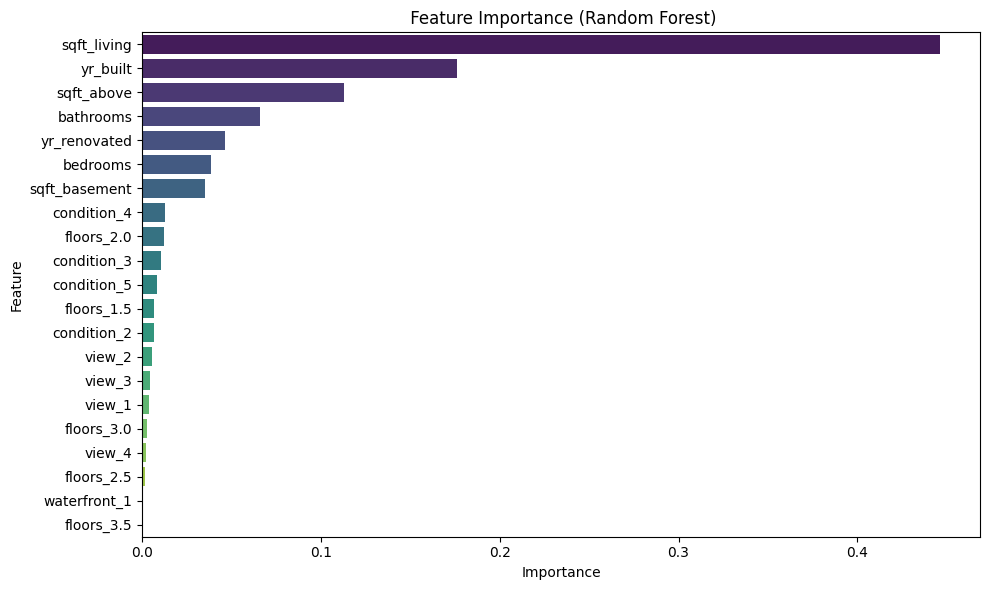

In [35]:
# Takes Importance features (atributes) from the model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# make data frame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title(' Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


### 🔍 Feature Importance (Random Forest)

Based on the Random Forest model, the features that have the most influence on house price prediction are:

1. **sqft_living**
The size of the living area has the most dominant influence on price — the larger it is, the more expensive it is.

2. **yr_built**
The year the house was built also has a strong influence, reflecting that newer houses tend to have higher values.

3. **sqft_above**
The area of ​​the building above the land is also highly correlated with price.

4. **bathrooms & bedrooms**
The number of bathrooms and bedrooms has a moderate influence on price prediction, although not as strong as the size of the house.

5. **yr_renovated**
The last renovation also determines the price, although the effect is not as big as the main features above.

Features such as **view**, **floors**, and **waterfront** have a much smaller influence according to the model, although they can visually influence buyers' perceptions.

---

🔧 **What is the use?**
This feature importance can help us in:
- Simplifying the model (feature selection)
- Explaining insights to stakeholders (eg: Mr. Cho can focus on houses with newer areas and construction years)

### 💸 Reversing Log Price Transformation

Since we trained the model using `log_price` to improve performance and normality, we now convert the predicted results back to the original price scale using `np.expm1()`.

- `np.expm1()` is used instead of `np.exp()` to better handle small numerical values and preserve precision.
- This allows us to present results in actual currency (e.g., USD) for Mr. Cho to interpret more easily.

The resulting table displays:

- **Actual Price**: The real value of a house from the test set.
- **Predicted Price (RF)**: The estimated price by our trained Random Forest model.

You can sort or filter this table further to match Mr. Cho’s preferences — for example:
- Limit by budget
- Minimum bedrooms or bathrooms
- Filter by location

This forms the foundation for personalized **house recommendations**!

In [19]:
# Reverse transform: log_price → original price
y_test_actual = np.expm1(y_test)  # from log back to original price
y_pred_rf_actual = np.expm1(y_pred_rf)  # predicted price

# Create a DataFrame to compare actual vs predicted prices
result_df = pd.DataFrame({
    'Actual Price': y_test_actual,
    'Predicted Price (RF)': y_pred_rf_actual
})

# Sort to get top recommendations (optional)
result_df = result_df.sort_values(by='Predicted Price (RF)', ascending=True)
result_df.head(10)  # show 10 cheapest predictions

,Actual Price,Predicted Price (RF)
1164,235750.0,162906.843106
180,175000.0,166880.904549
3614,339900.0,166920.585906
718,190000.0,173885.831951
733,280000.0,177111.833349
3223,139000.0,181730.207018
3435,252750.0,192715.160924
4147,148000.0,195187.153619
2144,234999.0,195450.844443
3992,215000.0,198918.265196


### 🏠 Top 10 Cheapest Predicted Houses

The table above lists the **10 houses with the lowest predicted prices** based on our trained Random Forest model. This is especially useful for Mr. Cho, who may want to look at affordable options first before applying further filters.

**Column Description**:
- `Actual Price`: The true house price from the test dataset.
- `Predicted Price (RF)`: The estimated price predicted by the Random Forest model.

While some predictions are close, others may underpredict or overpredict — which is expected, and will be further improved with more advanced modeling or feature engineering.

Next steps might include:
- Sorting by prediction error
- Visualizing prediction gaps

In [20]:
# Tambahkan kolom error (selisih absolut)
result_df['Error'] = abs(result_df['Actual Price'] - result_df['Predicted Price (RF)'])

# Urutkan dari error terbesar
sorted_error = result_df.sort_values(by='Error', ascending=False)

# Tampilkan top 10 prediksi paling meleset
sorted_error.head(10)

,Actual Price,Predicted Price (RF),Error
2031,1150000.0,355421.110999,794578.889001
220,1050000.0,447026.586072,602973.413928
1697,1035000.0,458001.296455,576998.703545
3958,1025000.0,481840.790476,543159.209524
764,839000.0,298064.043756,540935.956244
2307,1085000.0,587005.157295,497994.842705
2954,970500.0,473969.352671,496530.647329
4345,84350.0,576659.190590,492309.190590
2979,925000.0,467774.097474,457225.902526
2025,1035000.0,587151.385932,447848.614068


### 🔍 Top 10 Most Inaccurate Predictions (by Absolute Error)

The table below shows the 10 predictions with the highest absolute error, sorted descending. These cases are useful to investigate where the model struggles the most.

| Index | Actual Price | Predicted Price (RF) | Absolute Error |
|-------|--------------|----------------------|----------------|
| 2031  | 1,150,000    | 355,421              | **794,579**    |
| 220   | 1,050,000    | 447,027              | **602,973**    |
| 1697  | 1,035,000    | 458,001              | **576,999**    |
| 3958  | 1,025,000    | 481,841              | **543,159**    |
| 764   | 839,000      | 298,064              | **540,936**    |
| ...   | ...          | ...                  | ...            |

These large gaps may suggest:
- The model struggles with very expensive houses.
- Some high-end properties might have unique features not captured in the dataset.
- Potential need for feature engineering (e.g., location-based variables).

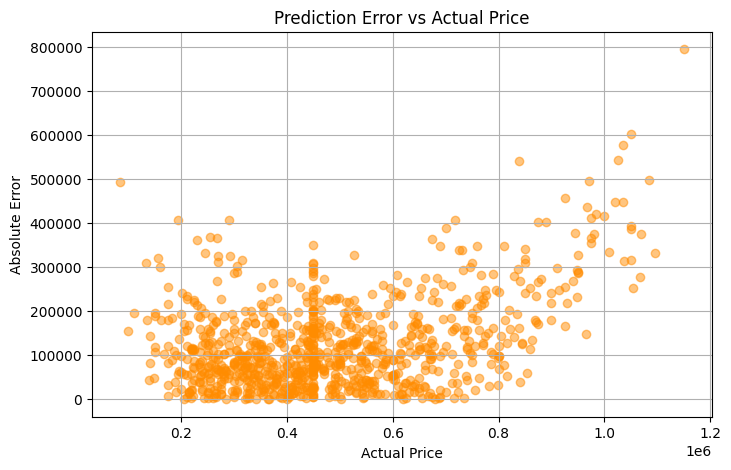

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(result_df['Actual Price'], result_df['Error'], alpha=0.5, color='darkorange')
plt.title('Prediction Error vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

### 🔍 Error Analysis: Prediction Error vs Actual Price

This scatter plot visualizes the absolute prediction error compared to the actual house price.

**Observations:**
- The model tends to make **larger errors on more expensive houses** (above ~$700,000).
- For mid-priced homes, errors are more stable and generally lower.
- This suggests the model performs better in the middle price segment but struggles with **high-end or luxury properties**.

**Potential reasons:**
- Luxury homes may have unique or rare features not captured well in the data (e.g., location prestige, architectural style).
- There may be a lack of enough training examples for those high-priced segments.
- Feature transformation or more complex models could help address this.

## 🧠 Beyond Prediction: Exploring House Segments with Clustering

While price prediction models like Linear Regression and Random Forest are useful for estimating house prices, they do not provide insights into the *types of houses* available on the market.

For someone like Mr. Cho, who might still be exploring what kind of property suits his needs best (e.g., large house vs renovated classic), it’s helpful to group similar houses together.

To address this, we’ll apply **unsupervised learning (clustering)** to uncover natural groupings of houses based on multiple features. This can help identify segments like:

- 🏠 Affordable but spacious homes  
- 🛠️ Older houses that have been renovated  
- 💰 Premium properties with modern build

We'll use the **K-Means clustering algorithm** and explore how many clusters best describe the data using the **Elbow Method**.


## 🧠 House Clustering using K-Means

 we now explore clustering to uncover potential house segments based on their characteristics. This can be useful for:

- Understanding different market groups
- Targeted marketing or pricing strategies
- Recommending types of properties based on user preference

We will follow this step-by-step:

### 1️⃣ Feature Selection

To begin clustering, we need to select the relevant features. Since clustering is an **unsupervised learning** task, we must remove:

- Non-numeric features (e.g., address, city, etc.)
- Price-related columns (`price`, `log_price`), because we don't want clustering to be biased toward price.
- Date information, as it's not helpful in raw form.

This leaves us with only the numeric house attributes that describe the physical and structural characteristics.

In [22]:
# Drop columns not useful for clustering
features_for_clustering = df.drop(columns=[
    'price', 'log_price', 'street', 'city', 'statezip', 'country', 'date'
])

# Preview the features
features_for_clustering.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340.0,7912.0,1.5,0,0,3,1340.0,0.0,1955,2005
1,5.0,2.50,3650.0,9050.0,2.0,0,4,5,3370.0,280.0,1921,0
2,3.0,2.00,1930.0,11947.0,1.0,0,0,4,1930.0,0.0,1966,0
3,3.0,2.25,2000.0,8030.0,1.0,0,0,4,1000.0,1000.0,1963,0
4,4.0,2.50,1940.0,10500.0,1.0,0,0,4,1140.0,800.0,1976,1992


### 2️⃣ Feature Scaling

Clustering algorithms like K-Means are **distance-based**, so having features on different scales can bias the results. For example:

- `sqft_living` might range in the thousands
- `condition` ranges only from 1 to 5

To avoid this, we standardize the features using `StandardScaler` so that each feature has a **mean of 0 and standard deviation of 1**.

In [23]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# Optional: convert back to DataFrame if you want to inspect
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering.columns)
X_scaled_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.436308,-0.843810,-0.905891,0.146661,-0.022648,-0.08146,-0.306647,-0.665622,-0.566124,-0.680625,-0.530825,1.221708
1,1.774869,0.444408,2.081014,0.469250,0.905905,-0.08146,4.920139,2.296965,2.251508,0.010382,-1.673421,-0.825643
2,-0.436308,-0.199701,-0.143002,1.290463,-0.951201,-0.08146,-0.306647,0.815672,0.252794,-0.680625,-0.161161,-0.825643
3,-0.436308,0.122354,-0.052489,0.180110,-0.951201,-0.08146,-0.306647,0.815672,-1.038042,1.787256,-0.261979,-0.825643
4,0.669281,0.444408,-0.130071,0.880282,-0.951201,-0.08146,-0.306647,0.815672,-0.843723,1.293680,0.174896,1.208434


### 3️⃣ Elbow Method for Determining Optimal Clusters (k)

Before we apply K-Means clustering, we need to decide the best number of clusters (k).  
To do this, we use the **Elbow Method**, which plots the total within-cluster sum of squares (WCSS) for different values of `k`.

The "elbow point" on the plot indicates where adding more clusters doesn't significantly reduce the WCSS — this is our optimal k.

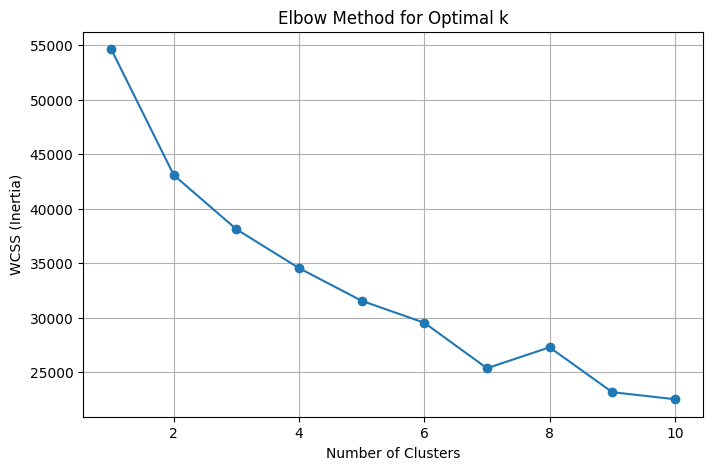

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k (number of clusters)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

### 4️⃣ Apply K-Means Clustering

Using the optimal number of clusters (`k = 4`) based on the Elbow Method, we apply K-Means clustering to group similar houses based on their features.

This helps us identify distinct segments in the housing market, such as budget-friendly homes, mid-range homes, luxury homes, etc.

In [25]:
# Apply KMeans with optimal k
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Display the number of data points per cluster
df_clustered['Cluster'].value_counts().sort_index()

,count
Cluster,
0,1572
1,272
2,1011
3,1696


Now that each house has been assigned to a cluster, we can analyze the characteristics of each group.

By grouping houses and calculating their average features (e.g., number of bedrooms, size, build year), we can better understand what defines each cluster.

This analysis can help:
- Identify what type of house belongs in each segment
- Reveal hidden patterns that price alone doesn’t capture
- Support Mr. Cho in choosing not just the “cheapest” house, but the one that fits his needs

We’ll start by looking at summary statistics per cluster.

### 🧩 Cluster Profiling: Understanding Each Group

To understand the characteristics of each cluster, we calculate the average values of key features per cluster. This helps us identify what makes each group of houses unique.

**Examples of what we may discover:**
- Cluster 0 might consist of older, smaller homes with fewer bedrooms.
- Cluster 1 could represent large, newer houses with more bathrooms and a finished basement.
- Cluster 2 might contain compact but recently renovated homes.
- Cluster 3 could include premium homes with high views and modern conditions.

This profiling provides Mr. Cho with deeper insights into what type of house he may prefer — not just by price, but also by feature combinations.

In [28]:
# Hitung rata-rata fitur per cluster
cluster_summary = df_clustered.groupby('Cluster')[['sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'sqft_basement', 'view', 'condition']].mean()

# Tampilkan ringkasan cluster
cluster_summary

,sqft_living,bedrooms,bathrooms,yr_built,sqft_basement,view,condition
Cluster,,,,,,,
0,1334.909033,2.756997,1.423028,1953.748092,107.863232,0.068702,3.467557
1,2752.191176,4.033088,2.983456,1967.426471,621.753676,2.841912,3.558824
2,2286.641939,3.848665,2.241098,1956.161227,766.764590,0.110781,3.921860
3,2433.888561,3.612618,2.649322,1995.860849,83.288915,0.044222,3.133255


### 🧭 Visualizing Clusters with PCA (2D Projection)

We used **Principal Component Analysis (PCA)** to reduce our multi-dimensional house feature data into just 2 dimensions, making it easier to visualize the clusters.

Even though PCA reduces data dimensions, it tries to preserve the **maximum variance (information)** in the data, which helps us still see meaningful separation between groups.

🔍 **Why PCA is useful:**
- Our dataset contains many numeric features (sqft, bedrooms, year built, etc.).
- Plotting in original space (with many dimensions) is not feasible.
- PCA helps us **visualize high-dimensional clustering** in 2D space while keeping most of the structure intact.

---

### 🔎 Interpretation of the Plot

- Each dot is a house.
- Each color represents a cluster from K-Means (`k = 4`).
- The clusters show **moderate separation**, with some overlaps, which is normal in real-world housing data.
- **Well-separated clusters** (like Cluster 0 and 3) indicate distinct groups of homes, possibly by price range, size, or age.
- **Overlapping areas** suggest houses with mixed characteristics (e.g., medium-sized but in different conditions or views).

This helps stakeholders like **Mr. Cho** understand that there are clear segments in the market — such as affordable homes, luxury homes, and medium-tier homes — each with distinct profiles.

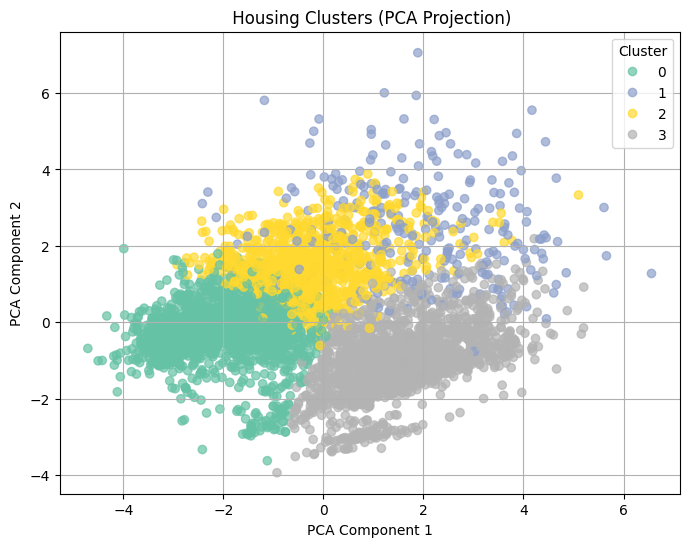

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Lakukan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat plot scatter 2D berdasarkan hasil clustering
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Set2', alpha=0.7)
plt.title(' Housing Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

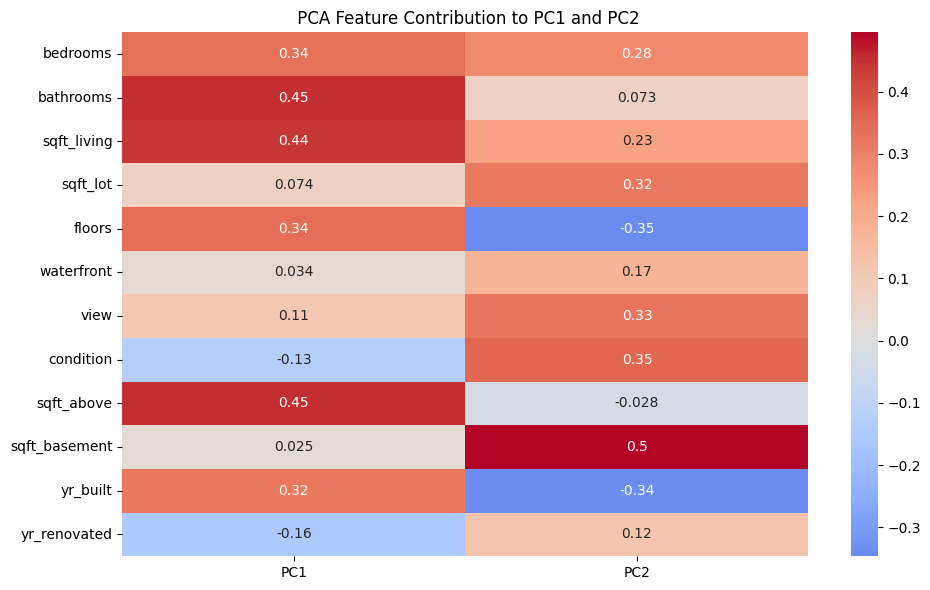

In [37]:
# Ambil nama kolom dari features_for_clustering
features_used = features_for_clustering.columns

# Loadings: kontribusi fitur ke PC1 dan PC2
loadings_df = pd.DataFrame(
    pca.components_.T,
    index=features_used,
    columns=['PC1', 'PC2']
)

# Plot heatmap kontribusi fitur
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title(' PCA Feature Contribution to PC1 and PC2')
plt.tight_layout()
plt.show()

### 🧭 PCA Feature Loadings from Full Feature Set

This heatmap shows how much each feature contributes to PC1 and PC2. These principal components are combinations of all scaled numerical features used in clustering.

With this we can:
- Understand which features most influence the PCA projection
- Interpret directions and separations in the 2D scatterplot
- Identify which clusters might be dominated by size, age, or renovation

If a feature has a high positive or negative value, it heavily affects that axis.

Example:
- High loading of `sqft_living` on PC1 → size matters most in that direction
- High loading of `yr_renovated` or `condition` on PC2 → recent improvements define that axis

### 🔍 PCA Feature Contribution Analysis

The heatmap above illustrates the **contribution of each feature** to the first two principal components (PC1 and PC2) generated by PCA. These components represent the directions of highest variance in the dataset and help us visualize multi-dimensional data in 2D.

#### 🔹 Key Observations:

- **PC1** captures variance related to **house size and room count**:
  - Strong positive contributions from `bathrooms`, `sqft_living`, and `sqft_above` (≈ 0.45 each).
  - Also supported by `bedrooms`, `floors`, and `yr_built`.

- **PC2** represents variance more associated with **age, renovation, and condition**:
  - High positive loadings from `sqft_basement`, `condition`, and `view`.
  - Negative contributions from `floors`, `yr_built`, and `sqft_above` indicate inverse influence on this axis.

#### 🔹 Interpretation:
- Homes that score high on **PC1** likely have **larger living areas and more rooms**.
- Homes that score high on **PC2** tend to have **renovations or better condition**, and possibly a **larger basement area**.

#### 🎯 Why it matters:
Understanding which features dominate each principal component helps us **interpret clusters in PCA plots**. For instance:
- A cluster located far along the PC1 axis likely groups **large or luxury homes**.
- A cluster extending along PC2 might highlight **well-renovated or upgraded homes** regardless of size.

### 🧭 Understanding Market Segments

After performing clustering and reducing the feature space using PCA, it's time to **interpret what each cluster actually means** in the context of the housing market.

Rather than relying on arbitrary groupings, our clusters were created based on **patterns in features like size, number of rooms, year built, and more**.

By analyzing the average characteristics of each cluster, we can uncover insights like:
- Which cluster represents budget-friendly houses?
- Which one contains modern, recently built homes?
- Which group tends to have better scenic views?

Let’s break down each cluster:

In [31]:
# Hitung rata-rata per cluster
cluster_profile = df_clustered.groupby('Cluster')[
    ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'view', 'condition']
].mean().round(1)

# Tambahkan jumlah anggota tiap cluster
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
cluster_profile['Count'] = cluster_counts

# Tampilkan hasil
cluster_profile

,price,sqft_living,bedrooms,bathrooms,yr_built,view,condition,Count
Cluster,,,,,,,,
0,369286.5,1334.9,2.8,1.4,1953.7,0.1,3.5,1572
1,612150.6,2752.2,4.0,3.0,1967.4,2.8,3.6,272
2,526630.0,2286.6,3.8,2.2,1956.2,0.1,3.9,1011
3,548337.5,2433.9,3.6,2.6,1995.9,0.0,3.1,1696


### 🧠 Cluster Interpretation

Based on the average feature values for each cluster, we can interpret the following segments:

---

#### 🟡 Cluster 0 — **Classic, Modest Homes**
- 🏠 Avg. size: ~1335 sqft
- 🛏️ Bedrooms: ~2.76 | 🛁 Bathrooms: ~1.42
- 🛠️ Built in: 1953 (oldest among all clusters)
- 📦 Small basement (~108 sqft)
- 👀 Very limited views (0.07)
- ⚙️ Condition: 3.47

These are smaller, older homes with minimal views and average condition — likely budget-friendly options.

---

#### 🟢 Cluster 1 — **Premium, Spacious Homes with Views**
- 🏠 Avg. size: ~2752 sqft
- 🛏️ Bedrooms: ~4.03 | 🛁 Bathrooms: ~2.98
- 🛠️ Built in: 1967
- 📦 Large basement (~622 sqft)
- 👀 High view score (2.84)
- ⚙️ Condition: 3.56

This cluster represents larger, premium homes with high scenic value — likely more expensive and desirable.

---

#### 🔵 Cluster 2 — **Big, Older Homes with Large Basements**
- 🏠 Avg. size: ~2287 sqft
- 🛏️ Bedrooms: ~3.85 | 🛁 Bathrooms: ~2.24
- 🛠️ Built in: 1956
- 📦 Largest basement (~767 sqft)
- 👀 Low view score (0.11)
- ⚙️ Condition: 3.92

Possibly older homes with extra space (e.g. finished basements) and in relatively good condition — good value potential.

---

#### 🟠 Cluster 3 — **Mid-size, Newer Homes**
- 🏠 Avg. size: ~2434 sqft
- 🛏️ Bedrooms: ~3.61 | 🛁 Bathrooms: ~2.65
- 🛠️ Built in: 1995 (most recent)
- 📦 Small basement (~83 sqft)
- 👀 Very low views (0.04)
- ⚙️ Condition: 3.13

These homes are newer and mid-sized but likely located in less scenic or more suburban areas.

---

💡 This segmentation helps Mr. Cho identify house types beyond price, such as “modern family homes,” “budget classics,” or “premium homes with views.”


#### 📍 Why is Cluster 1 Located Away from Others?

In the PCA projection, **Cluster 1** appears spatially distant from the other three clusters. This separation happens because:

- PCA reduces the dimensionality of features, and homes with **extreme or unique characteristics** (e.g., very large living space, many bathrooms, excellent views, recent renovation) will be projected far from average homes.
- These homes form a **distinct segment**, likely representing **premium or luxury housing**.
- The separation in space visually confirms that this cluster captures a **market segment with significantly different traits**.

➡️ The distance in PCA space suggests that homes in Cluster 1 are **not just numerically different**, but structurally distinct in feature composition.

### ✅ Final Recommendation for Mr. Cho

Based on our clustering analysis and feature interpretation:

- 🟢 **Cluster 1 (Premium Homes)** is ideal if Mr. Cho is looking for scenic views and spacious living — great for long-term investment or lifestyle upgrade.
- 🟠 **Cluster 3 (Mid-size, Newer Homes)** offers a balance between modernity and affordability, especially in suburban areas.
- 🟡 **Cluster 0 (Classic Homes)** could be a budget choice, but likely requires renovation.
- 🔵 **Cluster 2 (Large, Older Homes)** might be suitable for families needing space, especially with finished basements.

🏁 These insights help Mr. Cho make more confident, data-driven home-buying decisions tailored to his lifestyle and budget.
